In [26]:
%matplotlib inline

In [27]:
import numpy as np
import pandas as pd
import datetime as dt
import pytz
import matplotlib.pyplot as plt
from kam11 import thermister, ctd

In [28]:
WHOIString = thermister.WHOI_TS()
CTD = ctd.CTD()
ssConverter = thermister.SoundSpeedFromTemp()
ss_WHOI = ssConverter(WHOIString.WHOIString)

In [29]:
# Compare around a CTD cast number
castNum = 8
plotTimeRange = dt.timedelta(0,3600)
centerTime = CTD.castTimes[castNum]

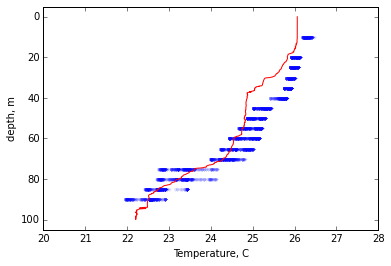

In [30]:
# Compare tempurature
WHOI_close = WHOIString.WHOIString.ix[\
                        (centerTime - plotTimeRange):
                        (centerTime + plotTimeRange), :]
_ = plt.plot(WHOI_close.T, WHOI_close.columns, 'b.',\
             alpha=0.1)
_ = plt.plot(CTD.temp[castNum], CTD.temp.index, 'r')
_ = plt.ylim(105, -5)
_ = plt.xlim(20, 28)
_ = plt.ylabel('depth, m')
_ = plt.xlabel('Temperature, C')

In [31]:
# Compare sound speed
WHOI_close = ss_WHOI.ix[(centerTime - plotTimeRange):
                          (centerTime + plotTimeRange), :]
_ = plt.plot(WHOI_close.T, WHOI_close.columns, 'b.',\
             alpha=0.1)
_ = plt.plot(CTD.ss[castNum], CTD.ss.index, 'r')
_ = plt.ylim(105, -5)
_ = plt.xlim(1528, 1538)
_ = plt.ylabel('depth, m')
_ = plt.xlabel('sound speed, m/s')